In [1]:
%matplotlib inline

import yaml
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.cm as cm

In [2]:
detector_reports  = ['yolo_v3', 'east', 'grayscale_data', 'yolo_v2']
# detector_reports  = ['grayscale_data', 'yolo_v3', 'east']
classifier_reports = ['shufflenet_night', 'shuffle_net', 'wrn_16_4', 'fixed_mobile_net']
classifier_report_path = '../report/classifier'
detector_report_path = '../report/detector'

In [20]:
def plot_classifiers():
    fig, ax = plt.subplots(figsize=(8, 6))
    sizes = []
    xs = []
    ys = []
    mapping = {
        "shufflenet_night": "ShuffleNetV2 Augmented",
        "shuffle_net": "ShuffleNetV2",
        "wrn_16_4": "WRN-16-4",
        "fixed_mobile_net": "MobileNetV2"
    }
    labels = []
    colors = cm.rainbow(np.linspace(0, 1, len(classifier_reports)))
    for i, classifier_report in enumerate(classifier_reports):
        path = os.path.join(classifier_report_path, classifier_report, 'results.yaml')
        with open(path) as f:
            data = yaml.load(f.read())
        print(f'{classifier_report}: {data["normal classification"]["accuracy"]}, {data["normal classification"]["optimistic accuracy"]}, {data["sign vs not sign"]["accuracy"]}, {data["sign vs not sign"]["optimistic accuracy"]}, {1 / data["normal classification"]["mean processing time"]}')
        classification_accuracy = data['normal classification']['accuracy']
        fps = 1 / data['normal classification']['mean processing time']
        model_size = data['num_params']
        sizes.append(model_size /10000)
        xs.append(fps)
        ys.append(classification_accuracy)
        text = mapping[classifier_report] + ': {:.2f}M'.format(model_size / 1000000)
        ax.annotate(text, (fps - 0.47 * len(text), classification_accuracy + 0.003), fontsize=12)
        ax.scatter(fps, classification_accuracy, s=sizes[-1], label=text)
    ax.set_xlabel('FPS')
    ax.set_ylabel('Accuracy')
    ax.set_xlim(40, 110)
    plt.grid()

shufflenet_night: 0.9623099527277373, 0.9560495719943785, 0.9922064648013287, 0.9862016098121886, 85.13997739448281
shuffle_net: 0.9778970231250799, 0.9722754567522678, 0.9925897534176569, 0.9897789702312508, 85.57485264922349
wrn_16_4: 0.9381627698990673, 0.9471061709467229, 0.9956560623482816, 0.9943784336271879, 96.678303959842
fixed_mobile_net: 0.9674204676121119, 0.8365912865721221, 0.9890123929985946, 0.9462118308419574, 52.76795902834277


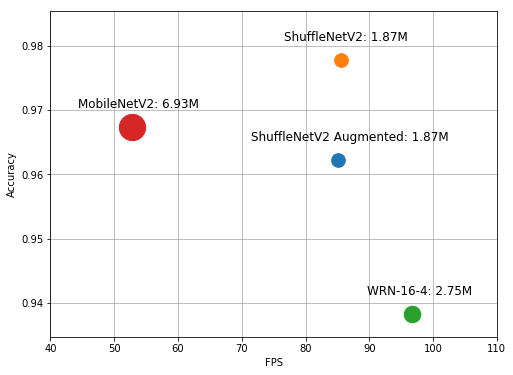

In [21]:
plot_classifiers()
plt.savefig('classifiers.pdf', transparent=True)

In [13]:
def plot_detectors(metric):
    fig, ax = plt.subplots(figsize=(8, 6))
    sizes = []
    xs = []
    ys = []
    mapping = {
        "grayscale_data": "SSDLite",
        "yolo_v2": "YOLOv2",
        "yolo_v3": "YOLOv3",
        "east": "EAST"
    }
    labels = []
    colors = cm.rainbow(np.linspace(0, 1, len(classifier_reports)))
    for i, detector_report in enumerate(detector_reports):
        path = os.path.join(detector_report_path, detector_report, 'results.yaml')
        with open(path) as f:
            data = yaml.load(f.read())
        classification_accuracy = data[0.5]['chinese']['optimistic {}'.format(metric)]
        fps = 1 / data[0.5]['chinese']['mean processing time']
        model_size = data['num_params']
        sizes.append(model_size /10000)
        xs.append(fps)
        ys.append(classification_accuracy)
        text = mapping[detector_report] + ': {:.2f}M'.format(model_size / 1000000)
        print(text)
        ax.annotate(text, (fps - 0.25 * len(text), classification_accuracy + 0.015), fontsize=12)
        ax.scatter(fps, classification_accuracy, s=sizes[-1], label=text)
    ax.set_xlabel('FPS')
    ax.set_ylabel(metric.capitalize())
    ax.set_xlim(-10, 20)
    ax.set_ylim(np.min(ys) - 0.1, np.max(ys) + 0.1)
    plt.grid()

YOLOv3: 61.58M
EAST: 3.09M
SSDLite: 3.10M
YOLOv2: 50.58M


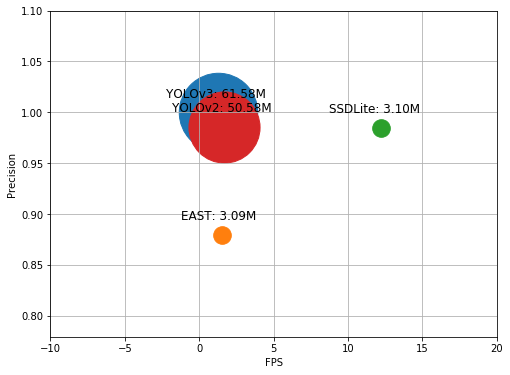

In [14]:
plot_detectors('precision')
plt.savefig('detectors-precision.pdf', transparent=True)

YOLOv3: 61.58M
EAST: 3.09M
SSDLite: 3.10M
YOLOv2: 50.58M


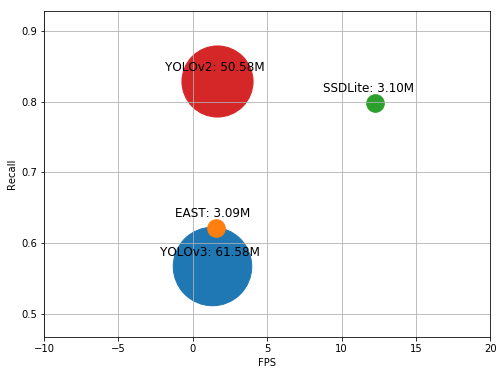

In [15]:
plot_detectors('recall')
plt.savefig('detectors-recall.pdf', transparent=True)